In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

# Use Keras API

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

In [6]:
# build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
# equivalent way by passing all layers during creation
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation='relu'), 
keras.layers.Dense(100, activation='relu'), 
keras.layers.Dense(10, activation='softmax')])
#keras.utils.plot_model(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #sparse categorical because we have sparse labels (only the index of the class, rather than a one-hot encoding)

## training and evaluating the model

In [9]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7231 - accuracy: 0.7668 - val_loss: 0.4954 - val_accuracy: 0.8410
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4853 - accuracy: 0.8309 - val_loss: 0.4847 - val_accuracy: 0.8254
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4382 - accuracy: 0.8456 - val_loss: 0.4073 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4108 - accuracy: 0.8560 - val_loss: 0.4060 - val_accuracy: 0.8564
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3894 - accuracy: 0.8625 - val_loss: 0.3756 - val_accuracy: 0.8720
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3736 - accuracy: 0.8686 - val_loss: 0.3677 - val_accuracy: 0.8758
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3608 - accuracy: 0.8729 - val_loss: 0.3555 - val_accuracy:

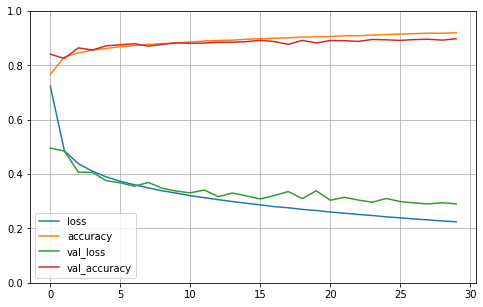

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.8857


[0.32755041122436523, 0.885699987411499]

In [12]:
# try out some predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [13]:
y_pred = np.argmax(y_proba, axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [15]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7927 - val_loss: 3.9316
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8018 - val_loss: 0.5325
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4645 - val_loss: 0.5038
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4350 - val_loss: 0.4581
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4475 - val_loss: 0.4474
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4116 - val_loss: 0.4402
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4014 - val_loss: 0.4380
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4000 - val_loss: 0.4195
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3882 - val_loss: 0.4153
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3849 - val_loss: 0.4186

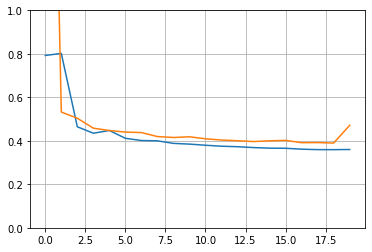

In [16]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Wide and Deep Neural Network with Functional API

In [17]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [18]:
# compile
model.compile(loss='mean_squared_error', optimizer='sgd')

# train
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# evaluate
mse_test = model.evaluate(X_test, y_test)


# predict

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5755 - val_loss: 304.5009
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 86.4787 - val_loss: 8021.8843
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================

### that training diverged. 

# use multiple inputs instead

In [19]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [20]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

/home/soeren/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7816 - val_loss: 0.8842
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7227 - val_loss: 0.6985
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6277 - val_loss: 0.6416
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5805 - val_loss: 0.6021
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5514 - val_loss: 0.5871
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5302 - val_loss: 0.5673
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5162 - val_loss: 0.5577
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5026 - val_loss: 0.5391
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4941 - val_loss: 0.5289
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4847 - val_loss: 0.5223

In [21]:
# same model, but with auxiliary output for the deep part
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='auxiliary_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# multiple outputs means multiple loss functions - and weights for them!
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9825 - main_output_loss: 0.8514 - auxiliary_output_loss: 2.1626 - val_loss: 0.7474 - val_main_output_loss: 0.6564 - val_auxiliary_output_loss: 1.5662
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5678 - main_output_loss: 0.4876 - auxiliary_output_loss: 1.2896 - val_loss: 0.8043 - val_main_output_loss: 0.7395 - val_auxiliary_output_loss: 1.3873
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5169 - main_output_loss: 0.4495 - auxiliary_output_loss: 1.1236 - val_loss: 0.5256 - val_main_output_loss: 0.4636 - val_auxiliary_output_loss: 1.0842
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4810 - main_output_loss: 0.4265 - auxiliary_output_loss: 0.9716 - val_loss: 0.5097 - val_main_output_loss: 0.4624 - val_auxiliary_output_loss: 0.9357
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4613 - main_output_l

# same model using subclassing API

In [22]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output




# Saving and Restoring a model

In [23]:
# model.save(my_name)
# model = keras.models.load_model(my_name)

# Callbacks

In [24]:
# build and compile model again
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='auxiliary_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# multiple outputs means multiple loss functions - and weights for them!
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

# callback, crude implementation of early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cb])



Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9903 - main_output_loss: 0.8131 - auxiliary_output_loss: 2.5853 - val_loss: 0.9516 - val_main_output_loss: 0.8881 - val_auxiliary_output_loss: 1.5226
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5836 - main_output_loss: 0.5111 - auxiliary_output_loss: 1.2362 - val_loss: 0.5625 - val_main_output_loss: 0.4949 - val_auxiliary_output_loss: 1.1704
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5004 - main_output_loss: 0.4410 - auxiliary_output_loss: 1.0352 - val_loss: 0.5195 - val_main_output_loss: 0.4666 - val_auxiliary_output_loss: 0.9954
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4802 - main_output_loss: 0.4351 - auxiliary_output_loss: 0.8865 - val_loss: 0.4903 - val_main_output_loss: 0.4490 - val_auxiliary_output_loss: 0.8618
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4384 - main_output_l

In [25]:
# use the official early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
363/363 [==============================] - 5s 13ms/step - loss: 0.3780 - main_output_loss: 0.3579 - auxiliary_output_loss: 0.5594 - val_loss: 0.4039 - val_main_output_loss: 0.3869 - val_auxiliary_output_loss: 0.5574
Epoch 2/10
363/363 [==============================] - 3s 7ms/step - loss: 0.3710 - main_output_loss: 0.3515 - auxiliary_output_loss: 0.5463 - val_loss: 0.4084 - val_main_output_loss: 0.3919 - val_auxiliary_output_loss: 0.5570
Epoch 3/10
363/363 [==============================] - 3s 7ms/step - loss: 0.3691 - main_output_loss: 0.3505 - auxiliary_output_loss: 0.5370 - val_loss: 0.3979 - val_main_output_loss: 0.3823 - val_auxiliary_output_loss: 0.5382
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3797 - main_output_loss: 0.3608 - auxiliary_output_loss: 0.5503 - val_loss: 0.4458 - val_main_output_loss: 0.4225 - val_auxiliary_output_loss: 0.6556
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3768 - main_output_

In [26]:
# build a custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

# Using Tensorboard to visualize the training

In [28]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


# build and compile model again
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='auxiliary_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# multiple outputs means multiple loss functions - and weights for them!
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 8s 15ms/step - loss: 1.1465 - main_output_loss: 1.0236 - auxiliary_output_loss: 2.2532 - val_loss: 1.0424 - val_main_output_loss: 1.0079 - val_auxiliary_output_loss: 1.3524
Epoch 2/30
363/363 [==============================] - 5s 13ms/step - loss: 0.5958 - main_output_loss: 0.5388 - auxiliary_output_loss: 1.1092 - val_loss: 0.5664 - val_main_output_loss: 0.5103 - val_auxiliary_output_loss: 1.0711
Epoch 3/30
363/363 [==============================] - 4s 12ms/step - loss: 0.5075 - main_output_loss: 0.4601 - auxiliary_output_loss: 0.9335 - val_loss: 0.5311 - val_main_output_loss: 0.4883 - val_auxiliary_output_loss: 0.9158
Epoch 4/30
363/363 [==============================] - 4s 10ms/step - loss: 0.4792 - main_output_loss: 0.4418 - auxiliary_output_loss: 0.8153 - val_loss: 0.5020 - val_main_output_loss: 0.4663 - val_auxiliary_output_loss: 0.8237
Epoch 5/30
363/363 [==============================] - 4s 11ms/step - loss: 0.4523 - main_out

### using tf.summary for custom logging

In [29]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scalar', np.sin(step / 10), step=10)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 RGB images
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step) 

# Hyperparameter Tuning

In [30]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# use a wrapper for that model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)


/home/soeren/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 4s 8ms/step - loss: 1.0756 - val_loss: 0.8153
Epoch 2/100
363/363 [==============================] - 3s 8ms/step - loss: 0.6197 - val_loss: 0.6195
Epoch 3/100
363/363 [==============================] - 2s 7ms/step - loss: 0.5429 - val_loss: 0.5610
Epoch 4/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4938 - val_loss: 0.5159
Epoch 5/100
363/363 [==============================] - 3s 8ms/step - loss: 0.4677 - val_loss: 0.5046
Epoch 6/100
363/363 [==============================] - 3s 8ms/step - loss: 0.4533 - val_loss: 0.4841
Epoch 7/100
363/363 [==============================] - 3s 7ms/step - loss: 0.4440 - val_loss: 0.4779
Epoch 8/100
363/363 [==============================] - 3s 8ms/step - loss: 0.4371 - val_loss: 0.4766
Epoch 9/100
363/363 [==============================] - 2s 7ms/step - loss: 0.4312 - val_loss: 0.4829
Epoch 10/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4294 - val_lo

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {'n_hidden': [0, 1, 2, 3], 'n_neurons': np.arange(1, 100), 'learning_rate': reciprocal(3e-4, 3e-2)}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])